<h1 style="padding:5px;background-color:rgb(150, 150, 150);margin:0;color:whote;font-size:300%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Monkeypox Cases Analysis</h1>

**Mpox (or monkeypox) is an illness caused by the monkeypox virus. It is a viral infection which can spread between people and occasionally from the environment to people via things and surfaces that have been touched by a person with mpox. In settings where the monkeypox virus is present among some wild animals, it can also be transmitted from infected animals to people who have contact with them.**

# <div style="padding:5px 5px 5px;background-color:rgb(20, 250, 250);margin:0;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Importing Libraries and Loading Data</div>

In [1]:
# Importing pandas,numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use the pd.read_csv() function to read a CSV file and load its contents into a DataFrame.
df=pd.read_csv("/kaggle/input/monkeypox-cases-countrywise-data/MONKEYPOX_daily_confirmed_cases.csv")

In [3]:
# Show dataframe
df

,Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
0,2022-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-17,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-02-28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-04,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-31,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-09-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,2022-09-19,0,0,0,0,0,0,0,0,391,...,0,0,0,0,0,0,0,1,0,0
138,2022-09-20,0,0,0,0,29,0,0,46,311,...,0,0,0,0,0,0,0,0,0,0
139,2022-09-21,0,0,0,0,0,0,0,0,157,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Rename column name country to Date
df.rename(columns={'Country': 'Date'}, inplace=True)

In [5]:
# Checking the shape of the DataFrame
df.shape

(141, 113)

In [6]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 113 entries, Date to China
dtypes: int64(112), object(1)
memory usage: 124.6+ KB


In [7]:
# Showing basic stats 
df.describe()

,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Belgium,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,1.964539,0.049645,0.056738,0.021277,24.198582,1.382979,6.439716,50.234043,173.070922,5.368794,...,0.007092,0.014184,0.028369,0.007092,0.007092,0.007092,0.007092,0.014184,0.007092,0.007092
std,6.605638,0.365010,0.410105,0.187772,56.007936,9.783119,13.717230,130.736739,273.811840,17.147433,...,0.084215,0.168430,0.205053,0.084215,0.084215,0.084215,0.084215,0.118672,0.084215,0.084215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,9.000000,19.000000,311.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,3.000000,4.000000,2.000000,275.000000,97.000000,77.000000,776.000000,1411.000000,89.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Checking for null values
df.isnull()

,Date,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Showing columns
df.columns

Index(['Date', 'Nigeria', 'Cameroon', 'Central African Republic',
       'Republic of Congo', 'England', 'Democratic Republic Of The Congo',
       'Portugal', 'Spain', 'United States',
       ...
       'Paraguay', 'South Sudan', 'El Salvador', 'Hong Kong', 'Egypt',
       'Jordan', 'Guam', 'Ukraine', 'Bahrain', 'China'],
      dtype='object', length=113)

In [10]:
df.value_counts()

Date        Nigeria  Cameroon  Central African Republic  Republic of Congo  England  Democratic Republic Of The Congo  Portugal  Spain  United States  Belgium  Germany  France  Canada  Sweden  Italy  Netherlands  Australia  Switzerland  Israel  Denmark  Austria  Scotland  United Arab Emirates  Czech Republic  Slovenia  Northern Ireland  Wales  Ireland  Argentina  Finland  Malta  Mexico  Norway  Hungary  Gibraltar  Morocco  Latvia  Ghana  Brazil  Greece  Poland  Venezuela  Romania  Benin  Iceland  Georgia  Luxembourg  Chile  Serbia  Singapore  Lebanon  South Africa  South Korea  Croatia  Colombia  Bulgaria  Bahamas  Taiwan  Peru  Estonia  Puerto Rico  Turkey  Panama  Dominican Republic  Ecuador  Jamaica  Slovakia  New Zealand  Russia  New Caledonia  Bosnia And Herzegovina  Saudi Arabia  India  Martinique  Barbados  Qatar  Costa Rica  Bermuda  Thailand  Monaco  Liberia  Andorra  Guadeloupe  Japan  Philippines  Uruguay  Sudan  Saint Martin (French part)  Bolivia  Montenegro  Cyprus  Lithu

In [11]:
# Checking for null value sum
df.isnull().sum()

Date                        0
Nigeria                     0
Cameroon                    0
Central African Republic    0
Republic of Congo           0
                           ..
Jordan                      0
Guam                        0
Ukraine                     0
Bahrain                     0
China                       0
Length: 113, dtype: int64

In [12]:
# Finding columns datatype
df.dtypes

Date                        object
Nigeria                      int64
Cameroon                     int64
Central African Republic     int64
Republic of Congo            int64
                             ...  
Jordan                       int64
Guam                         int64
Ukraine                      int64
Bahrain                      int64
China                        int64
Length: 113, dtype: object

In [13]:
df['United States']

0        0
1        0
2        0
3        0
4        0
      ... 
136      0
137    391
138    311
139    157
140    205
Name: United States, Length: 141, dtype: int64

In [14]:
# Sorting country names based on total number of cases
df1 = df.iloc[:, 1:].sum(axis=0)
print(df1.sort_values(ascending=False).to_string())

United States                       24403
Brazil                               7300
Spain                                7083
France                               3934
Germany                              3590
England                              3412
Peru                                 2251
Colombia                             1653
Canada                               1388
Mexico                               1367
Netherlands                          1221
Portugal                              908
Italy                                 837
Chile                                 783
Belgium                               757
Switzerland                           503
Argentina                             326
Austria                               304
Nigeria                               277
Israel                                250
Democratic Republic Of The Congo      195
Sweden                                186
Denmark                               183
Ireland                           

In [15]:
# parse the dates, currently coded as strings, into datetime format

df1 = pd.to_datetime(df['Date'])
df1


0     2022-01-31
1     2022-02-17
2     2022-02-28
3     2022-03-04
4     2022-03-31
         ...    
136   2022-09-18
137   2022-09-19
138   2022-09-20
139   2022-09-21
140   2022-09-22
Name: Date, Length: 141, dtype: datetime64[ns]

In [16]:
# Extract month from date

df['Month'] = df1.dt.month
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

<h1 style="padding:5px;background-color:rgb(15, 100, 150);margin:0;color:whote;font-size:300%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:500">Visulization-Matplotlib</h1>

#### Bar plot

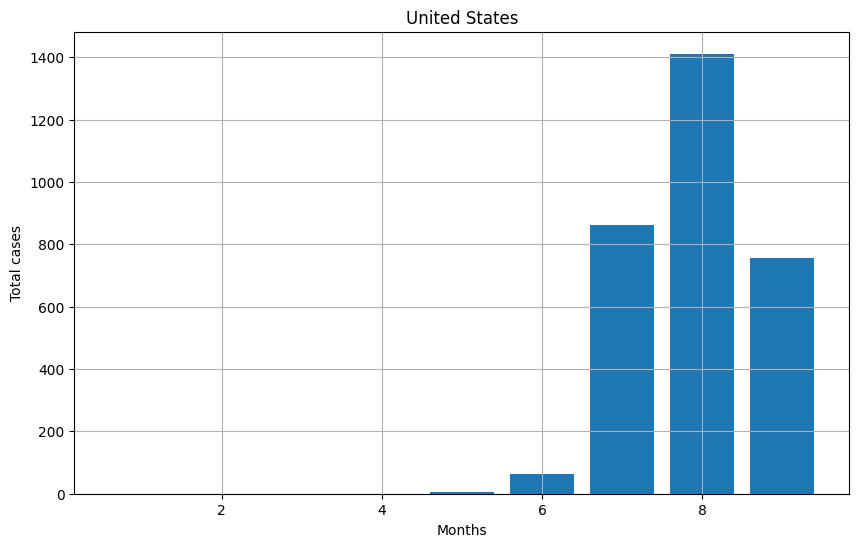

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['United States'])
plt.xlabel('Months')
plt.ylabel('Total cases')
plt.title('United States')
plt.grid(True)
plt.show()

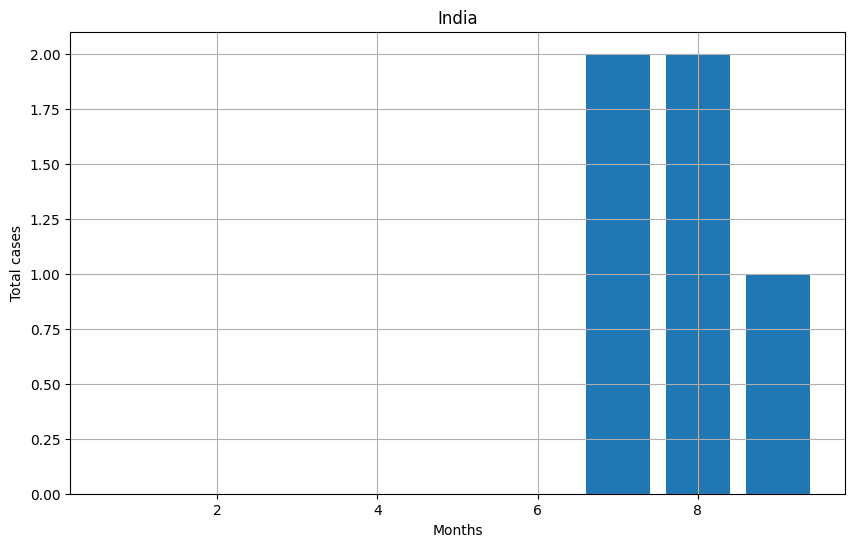

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['India'])
plt.xlabel('Months')
plt.ylabel('Total cases')
plt.title('India')
plt.grid(True)
plt.show()

#### Line Plot

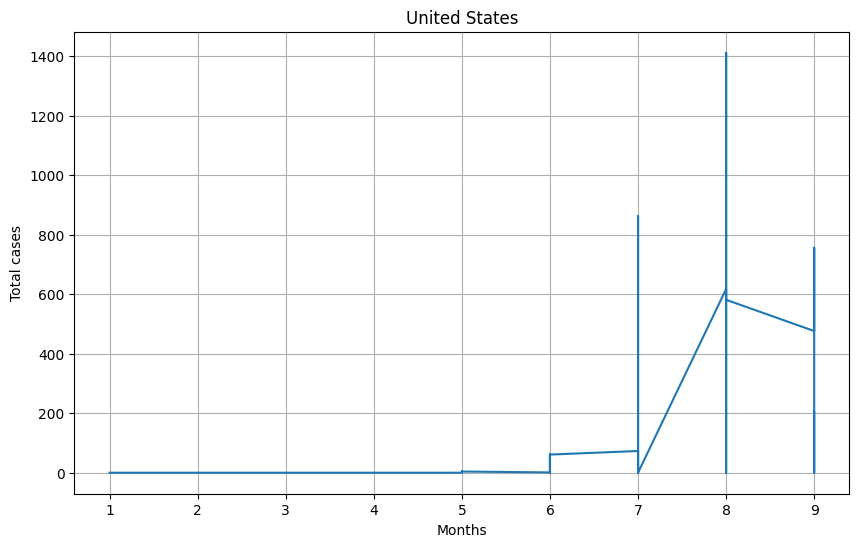

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['United States'])
plt.title('United States')
plt.xlabel('Months')
plt.ylabel('Total cases')
plt.grid(True)
plt.show()

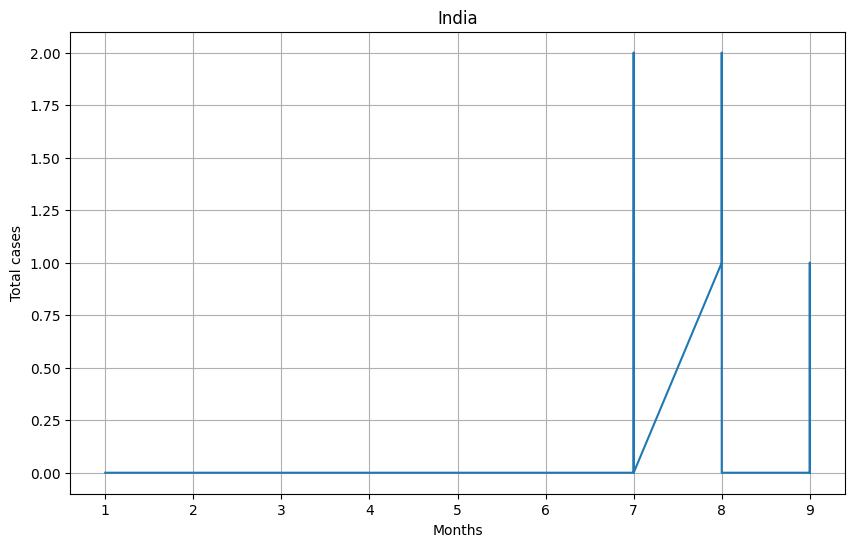

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['India'])
plt.title('India')
plt.xlabel('Months')
plt.ylabel('Total cases')
plt.grid(True)
plt.show()

#### scatter Plot

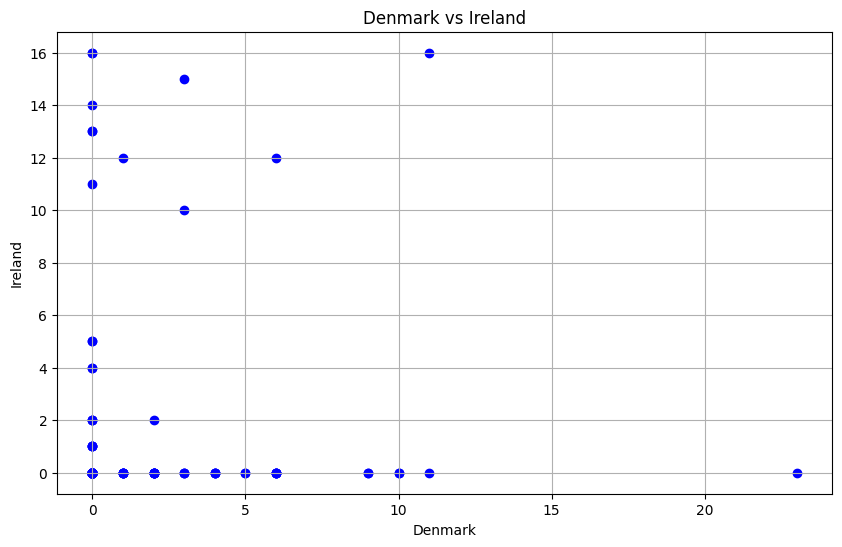

In [21]:
# Scatter plot of First Innings Wickets vs. Second Innings Wickets

plt.figure(figsize=(10, 6))
plt.scatter(df['Denmark'], df['Ireland'], color='blue')
plt.xlabel('Denmark')
plt.ylabel('Ireland')
plt.title('Denmark vs Ireland')
plt.grid(True)
plt.show()